### Final proyect
# Landscape of *Tapirella bairdii* in Chiapas, Mex. 

### Introduction

##### The human impact on the activities of wildlife what could be altering their behaviours and activity patterns. In mammals, this could be an answer to the perceived risk. In 2020 [1], it was found that the loss of habitat for a predators population of *Canis latrans* represented an increase in bold behaviours like attraction to novel objects (camera traps) if the populations are subject to higher densities of human housing.
##### When discussing overexploitation, hunting is often portrayed as a cultural, tourist, or recreational activity that directly impacts wild populations.  The increase in alert behaviours as a response to anti-predator measures in places with high hunting levels has been registered for populations of *Cervus nippon* [2], which has been taken as a behavioural indicator of the population's status. 
##### Tourism also generates adverse effects on animal behaviour. Specimens of *Rangifer tarandus* are hunted in southern Norway. In this region, recreation and hiking have increased human affluence, augmented scape behaviour, since, over the years, the distance between animal and human, at the time of fleeing, the risk of exploration and boldness has increased while decreasing, due to not evaluating the risk before undertaking the fleeing behaviour [3].

##### 

[1]: https://brill.com/view/journals/beh/157/3-4/article-p289_4.xml
[2]: https://kmkjournals.com/upload/PDF/RJT/20/ther20_1_059-069.pdf
[3]: https://link.springer.com/article/10.1007/s00300-021-02

##### In Chiapas, Mexico, there is a project of monitoring wildlife using camera traps for ecological studies, but this data has recently been used for studying the behaviour of mammals, this is the case of *Tapirella bairdii*. This investigation compares the behaviours present by tapirs in contrast with their Human index, which is a measure that quantifies the human influence or pressure on a given environment or ecosystem.
##### On this occasion, we are looking for a correlation between fear behaviours and the Human index, which could suggest whether the monitoring has represented an alteration in the fear landscape of these mammals. 


### Objective
#### Explore whether there's a correlation between human impact (HI) and fear behaviours across 34 sites.

### Methods

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm

In [4]:
df = pd.read_csv('bold_tapir.csv')

# Preview the first rows
print(df.head())


  Etiquetas de fila        HI  alerta  beber  bostezar  caminar  defecar  \
0              CHA1  6.391846       4      0         0       61        0   
1             CHA1a  6.391846       3      0         0       12        0   
2              CHA2  1.920605       0      0         0       23        0   
3              CHA3  1.152446      11      0         0      164        0   
4             CHA4a  4.238337       0      0         0        6        0   

   espasmo  galopar  huida  ...  marcaje_orina  marcaje_rasca  alimentacion  \
0        0        1      2  ...              1              0             0   
1        0        0      1  ...              0              0            19   
2        0        2      0  ...              0              0             0   
3        1        4      4  ...             21              3            24   
4        0        0      0  ...              0              0             1   

   ensenar  confrontacion  descanso_alerta  descanso_total  ereccion

In [5]:
print(df.columns)

Index(['Etiquetas de fila', 'HI', 'alerta', 'beber', 'bostezar', 'caminar',
       'defecar', 'espasmo', 'galopar', 'huida', 'orinar', 'parental',
       'perdido', 'sacudirse', 'seguir', 'exploracion', 'objeto_novedoso',
       'marcaje_orina', 'marcaje_rasca', 'alimentacion', 'ensenar',
       'confrontacion', 'descanso_alerta', 'descanso_total', 'ereccion',
       'reproduccion', 'Total general'],
      dtype='object')


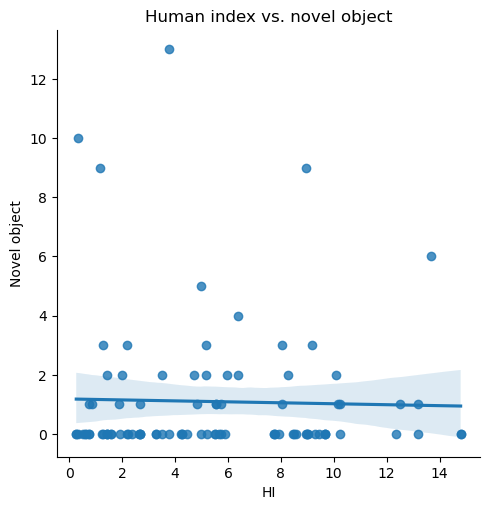

In [6]:
sns.lmplot(data=df, x='HI', y='objeto_novedoso', ci=95)
plt.title('Human index vs. novel object')
plt.xlabel('HI')
plt.ylabel('Novel object')
plt.show()

In [8]:
# Spearman correlation (robust to outliers and non-linearity)
spearman_corr, spearman_p = spearmanr(df['HI'], df['objeto_novedoso'])
print(f"Spearman: r = {spearman_corr:.2f}, p = {spearman_p:.4f}")

Spearman: r = 0.06, p = 0.5864


In [9]:
# Prepare data for regression
X = df['HI']
y = df['objeto_novedoso']
X = sm.add_constant(X)  # Adds intercept term

# Fit the model
model = sm.OLS(y, X).fit()

# Show model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        objeto_novedoso   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.06601
Date:                Wed, 10 Sep 2025   Prob (F-statistic):              0.798
Time:                        22:54:53   Log-Likelihood:                -209.21
No. Observations:                  93   AIC:                             422.4
Df Residuals:                      91   BIC:                             427.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1842      0.417      2.842      0.0

In [10]:
import statsmodels.formula.api as smf

# Fit Poisson model
poisson_model = smf.glm(
    formula='HI ~ objeto_novedoso',
    data=df,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HI   No. Observations:                   93
Model:                            GLM   Df Residuals:                       91
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.64
Date:                Wed, 10 Sep 2025   Deviance:                       266.66
Time:                        22:55:05   Pearson chi2:                     251.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001999
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6975      0.049     

In [11]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv("bold_tapir.csv")

# Divide the human_index into quartiles or custom bins
df['impact_group'] = pd.qcut(df['HI'], q=3, labels=['Low', 'Medium', 'High'])

# Optional: check how many in each group
print(df['impact_group'].value_counts())

impact_group
Low       33
High      31
Medium    29
Name: count, dtype: int64


In [12]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt


# Group data by impact level
grouped = df.groupby('impact_group')['objeto_novedoso']
groups = [group for name, group in grouped]

# Kruskal-Wallis test
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Test: H = {h_stat:.2f}, p = {p_value:.4f}")


Kruskal-Wallis Test: H = 1.41, p = 0.4944


C:\Users\rebec\AppData\Local\Temp\ipykernel_2948\760717828.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('impact_group')['objeto_novedoso']


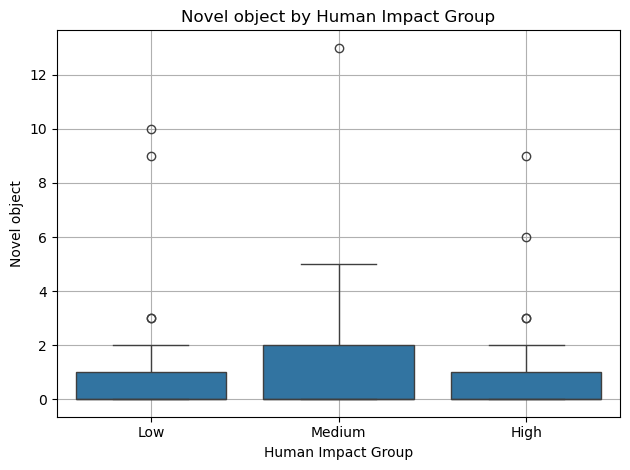

In [14]:
sns.boxplot(data=df, x='impact_group', y='objeto_novedoso')
plt.title('Novel object by Human Impact Group')
plt.xlabel('Human Impact Group')
plt.ylabel('Novel object')
plt.grid(True)
plt.tight_layout()
plt.show()

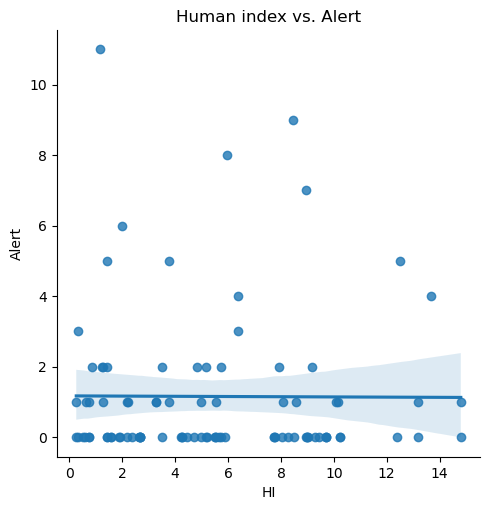

In [15]:
sns.lmplot(data=df, x='HI', y='alerta', ci=95)
plt.title('Human index vs. Alert')
plt.xlabel('HI')
plt.ylabel('Alert')
plt.show()

In [17]:
# Spearman correlation (robust to outliers and non-linearity)
spearman_corr, spearman_p = spearmanr(df['HI'], df['alerta'])
print(f"Spearman: r = {spearman_corr:.2f}, p = {spearman_p:.4f}")

Spearman: r = -0.05, p = 0.6295


In [18]:
# Prepare data for regression
X = df['HI']
y = df['alerta']
X = sm.add_constant(X)  # Adds intercept term

# Fit the model
model = sm.OLS(y, X).fit()

# Show model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 alerta   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                  0.002589
Date:                Wed, 10 Sep 2025   Prob (F-statistic):              0.960
Time:                        22:59:38   Log-Likelihood:                -200.93
No. Observations:                  93   AIC:                             405.9
Df Residuals:                      91   BIC:                             410.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1664      0.381      3.060      0.0

In [19]:
import statsmodels.formula.api as smf

# Fit Poisson model
poisson_model = smf.glm(
    formula='HI ~ alerta',
    data=df,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HI   No. Observations:                   93
Model:                            GLM   Df Residuals:                       91
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.73
Date:                Wed, 10 Sep 2025   Deviance:                       266.84
Time:                        22:59:43   Pearson chi2:                     252.
No. Iterations:                     4   Pseudo R-squ. (CS):          7.718e-05
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6904      0.051     33.268      0.0

In [20]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt


# Group data by impact level
grouped = df.groupby('impact_group')['alerta']
groups = [group for name, group in grouped]

# Kruskal-Wallis test
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Test: H = {h_stat:.2f}, p = {p_value:.4f}")


Kruskal-Wallis Test: H = 0.25, p = 0.8819


C:\Users\rebec\AppData\Local\Temp\ipykernel_2948\4111321276.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('impact_group')['alerta']


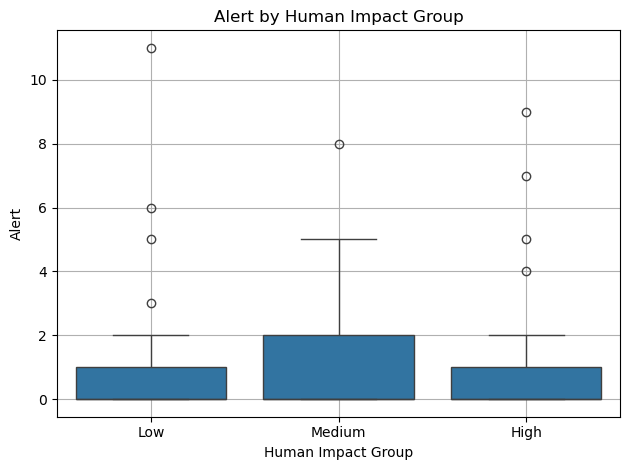

In [21]:
sns.boxplot(data=df, x='impact_group', y='alerta')
plt.title('Alert by Human Impact Group')
plt.xlabel('Human Impact Group')
plt.ylabel('Alert')
plt.grid(True)
plt.tight_layout()
plt.show()

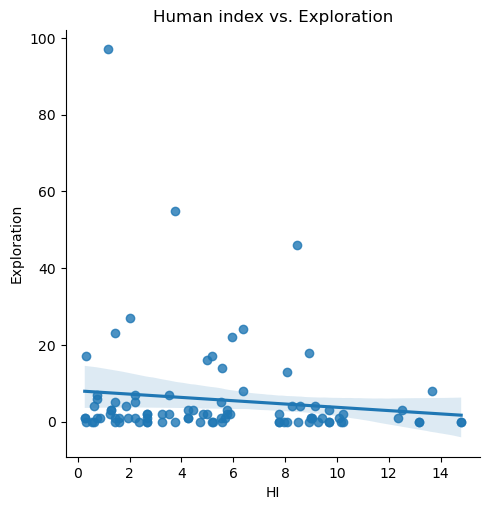

In [22]:
sns.lmplot(data=df, x='HI', y='exploracion', ci=95)
plt.title('Human index vs. Exploration')
plt.xlabel('HI')
plt.ylabel('Exploration')
plt.show()

In [23]:
# Spearman correlation (robust to outliers and non-linearity)
spearman_corr, spearman_p = spearmanr(df['HI'], df['exploracion'])
print(f"Spearman: r = {spearman_corr:.2f}, p = {spearman_p:.4f}")

Spearman: r = -0.16, p = 0.1333


In [24]:
# Prepare data for regression
X = df['HI']
y = df['exploracion']
X = sm.add_constant(X)  # Adds intercept term

# Fit the model
model = sm.OLS(y, X).fit()

# Show model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            exploracion   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.451
Date:                Wed, 10 Sep 2025   Prob (F-statistic):              0.231
Time:                        23:00:48   Log-Likelihood:                -370.52
No. Observations:                  93   AIC:                             745.0
Df Residuals:                      91   BIC:                             750.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0104      2.361      3.393      0.0

In [25]:
import statsmodels.formula.api as smf

# Fit Poisson model
poisson_model = smf.glm(
    formula='HI ~ exploracion',
    data=df,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HI   No. Observations:                   93
Model:                            GLM   Df Residuals:                       91
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -281.42
Date:                Wed, 10 Sep 2025   Deviance:                       262.23
Time:                        23:00:54   Pearson chi2:                     245.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04841
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7319      0.049     35.532      

In [26]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt


# Group data by impact level
grouped = df.groupby('impact_group')['exploracion']
groups = [group for name, group in grouped]

# Kruskal-Wallis test
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Test: H = {h_stat:.2f}, p = {p_value:.4f}")


Kruskal-Wallis Test: H = 4.03, p = 0.1336


C:\Users\rebec\AppData\Local\Temp\ipykernel_2948\2810532700.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('impact_group')['exploracion']


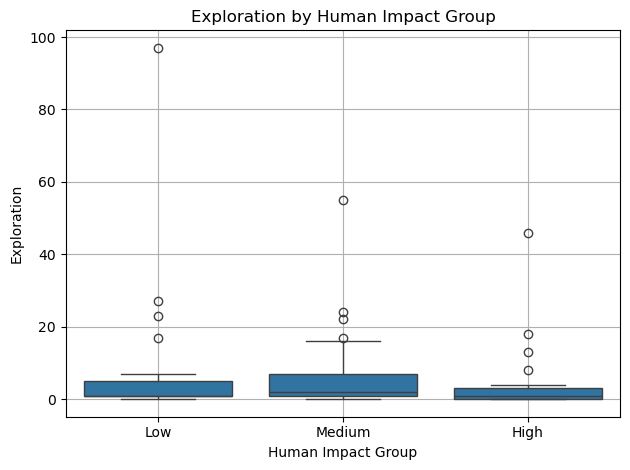

In [28]:
sns.boxplot(data=df, x='impact_group', y='exploracion')
plt.title('Exploration by Human Impact Group')
plt.xlabel('Human Impact Group')
plt.ylabel('Exploration')
plt.grid(True)
plt.tight_layout()
plt.show()

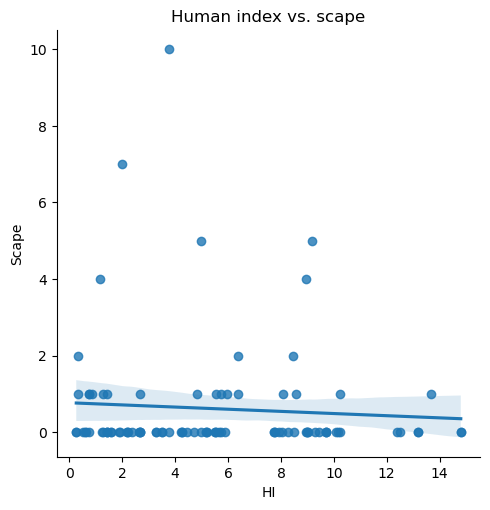

In [29]:
sns.lmplot(data=df, x='HI', y='huida', ci=95)
plt.title('Human index vs. scape')
plt.xlabel('HI')
plt.ylabel('Scape')
plt.show()

In [30]:
# Spearman correlation (robust to outliers and non-linearity)
spearman_corr, spearman_p = spearmanr(df['HI'], df['huida'])
print(f"Spearman: r = {spearman_corr:.2f}, p = {spearman_p:.4f}")

Spearman: r = -0.07, p = 0.4782


In [31]:
# Prepare data for regression
X = df['HI']
y = df['huida']
X = sm.add_constant(X)  # Adds intercept term

# Fit the model
model = sm.OLS(y, X).fit()

# Show model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  huida   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4421
Date:                Wed, 10 Sep 2025   Prob (F-statistic):              0.508
Time:                        23:02:03   Log-Likelihood:                -172.62
No. Observations:                  93   AIC:                             349.2
Df Residuals:                      91   BIC:                             354.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7656      0.281      2.723      0.0

In [32]:
import statsmodels.formula.api as smf

# Fit Poisson model
poisson_model = smf.glm(
    formula='HI ~ huida',
    data=df,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                     HI   No. Observations:                   93
Model:                            GLM   Df Residuals:                       91
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.08
Date:                Wed, 10 Sep 2025   Deviance:                       265.55
Time:                        23:02:09   Pearson chi2:                     249.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01388
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7084      0.048     35.788      0.0

In [33]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt


# Group data by impact level
grouped = df.groupby('impact_group')['huida']
groups = [group for name, group in grouped]

# Kruskal-Wallis test
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis Test: H = {h_stat:.2f}, p = {p_value:.4f}")


Kruskal-Wallis Test: H = 0.40, p = 0.8198


C:\Users\rebec\AppData\Local\Temp\ipykernel_2948\1464833605.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('impact_group')['huida']


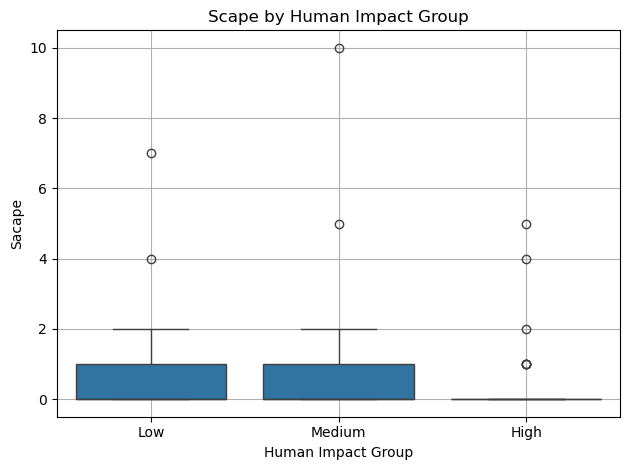

In [34]:
sns.boxplot(data=df, x='impact_group', y='huida')
plt.title('Scape by Human Impact Group')
plt.xlabel('Human Impact Group')
plt.ylabel('Sacape')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Discussion

##### We found that there are no correlations between the human impact on fear behaviours in Tapirella bairdii in the regions of Chiapas, Mexico, where a project of monitoring by camera traps it’s taking place. That suggests that the projects that look for conservation of the zone and its fauna, like mammals, are actually working very well. 